In [13]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [14]:
%matplotlib inline

In [15]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree.pkl")
model_rand = load_pickle_zip("../models/models/tree_rand.pkl")
res_ex = load_pickle_zip("../models/solutions/tree.pkl")
res_ex_rand = load_pickle_zip("../models/solutions/tree_rand.pkl")

In [16]:
betas = res_ex["betas"]

In [19]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=10000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.171 std_fe: 1.32E-01 M: 0.007 S: 0.693 E: 0.001M: 0.0343, B1 = -0.000000
fe: -6.977 std_fe: 9.52E-06 M: 0.009 S: 0.689 E: -0.087: 0.0183, B1 = -0.000
fe: -3.557 std_fe: 9.90E-06 M: 0.010 S: 0.674 E: -0.185: 0.0345, B1 = -0.000
fe: -2.447 std_fe: 9.71E-06 M: 0.008 S: 0.655 E: -0.265: 0.0225, B1 = -0.000
fe: -1.913 std_fe: 1.00E-05 M: 0.010 S: 0.627 E: -0.345: 0.0155, B1 = 0.0000
fe: -1.608 std_fe: 9.46E-06 M: 0.010 S: 0.591 E: -0.426: 0.0249, B1 = -0.000
fe: -1.417 std_fe: 9.78E-06 M: 0.007 S: 0.552 E: -0.497: 0.0211, B1 = -0.000
fe: -1.290 std_fe: 9.56E-06 M: 0.009 S: 0.510 E: -0.562: 0.0278, B1 = 0.0000
fe: -1.202 std_fe: 9.71E-06 M: 0.009 S: 0.473 E: -0.611: 0.0146, B1 = 0.00000
fe: -1.139 std_fe: 9.90E-06 M: 0.006 S: 0.431 E: -0.660: 0.0117, B1 = -0.0000
fe: -1.094 std_fe: 1.05E-05 M: 0.009 S: 0.393 E: -0.701: 0.0209, B1 = -0.0000
fe: -1.060 std_fe: 9.88E-06 M: 0.006 S: 0.351 E: -0.740: 0.0175, B1 = 0.00000
fe: -1.034 std_fe: 1.02E-05 M: 0.004 S: 0.318 E: -0.769: 0.0118,

In [20]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693147.186 std_fe: 8.20E-02 M: 0.008 S: 0.693 E: -0.002: 0.0265, B1 = -0.000589
fe: -6.977 std_fe: 1.02E-05 M: 0.009 S: 0.689 E: -0.090: 0.0288, B1 = 0.017
fe: -3.557 std_fe: 1.02E-05 M: 0.007 S: 0.675 E: -0.182: 0.0185, B1 = -0.007
fe: -2.447 std_fe: 1.04E-05 M: 0.007 S: 0.653 E: -0.269: 0.0202, B1 = 0.0291
fe: -1.913 std_fe: 1.02E-05 M: 0.008 S: 0.623 E: -0.354: 0.0229, B1 = 0.1033
fe: -1.608 std_fe: 1.07E-05 M: 0.005 S: 0.590 E: -0.427: 0.03, B1 = 0.01818
fe: -1.417 std_fe: 1.02E-05 M: 0.007 S: 0.555 E: -0.492: 0.0237, B1 = 0.0377
fe: -1.290 std_fe: 1.05E-05 M: 0.007 S: 0.513 E: -0.557: 0.0374, B1 = 0.0398
fe: -1.202 std_fe: 1.08E-05 M: 0.014 S: 0.472 E: -0.611: 0.0389, B1 = 0.0022
fe: -1.139 std_fe: 1.09E-05 M: 0.007 S: 0.432 E: -0.660: 0.0214, B1 = 0.1223
fe: -1.094 std_fe: 1.09E-05 M: 0.013 S: 0.387 E: -0.706: 0.0194, B1 = -0.3833
fe: -1.060 std_fe: 1.08E-05 M: 0.006 S: 0.353 E: -0.739: 0.0197, B1 = 0.218
fe: -1.034 std_fe: 1.01E-05 M: 0.005 S: 0.318 E: -0.769: 0.0329, B1 = 

In [21]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = False, 
                           x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -693147.182 std_fe: 8.87E-05 M: 0.007 S: 0.693 E: -0.000: 0.0245, B1 = -0.000007
fe: -6.977 std_fe: 9.37E-09 M: 0.009 S: 0.688 E: -0.096: 0.0208, B1 = -0.000
fe: -3.557 std_fe: 8.82E-09 M: 0.010 S: 0.676 E: -0.176: 0.0174, B1 = 0.0000
fe: -2.447 std_fe: 9.46E-09 M: 0.011 S: 0.654 E: -0.268: 0.024, B1 = -0.0000
fe: -1.913 std_fe: 9.94E-09 M: 0.008 S: 0.626 E: -0.348: 0.0214, B1 = -0.000
fe: -1.608 std_fe: 1.03E-08 M: 0.011 S: 0.591 E: -0.426: 0.0222, B1 = 0.0000
fe: -1.417 std_fe: 1.10E-08 M: 0.008 S: 0.552 E: -0.497: 0.0328, B1 = -0.000
fe: -1.290 std_fe: 1.05E-08 M: 0.007 S: 0.511 E: -0.560: 0.0165, B1 = -0.000
fe: -1.202 std_fe: 1.29E-08 M: 0.008 S: 0.472 E: -0.612: 0.0412, B1 = 0.0000
fe: -1.139 std_fe: 1.28E-08 M: 0.011 S: 0.431 E: -0.660: 0.0168, B1 = 0.0000
fe: -1.094 std_fe: 1.34E-08 M: 0.014 S: 0.390 E: -0.703: 0.0274, B1 = -0.0000
fe: -1.060 std_fe: 1.59E-08 M: 0.008 S: 0.355 E: -0.737: 0.0143, B1 = 0.00000
fe: -1.034 std_fe: 1.56E-08 M: 0.007 S: 0.316 E: -0.771: 0.0138, B

In [22]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.977, ener: -0.092, M: 0.000, iter 4
fe: -3.557, ener: -0.182, M: 0.000, iter 4
fe: -2.447, ener: -0.269, M: 0.000, iter 4
fe: -1.913, ener: -0.351, M: 0.000, iter 4
fe: -1.608, ener: -0.427, M: 0.000, iter 4
fe: -1.417, ener: -0.496, M: 0.000, iter 4
fe: -1.290, ener: -0.558, M: 0.000, iter 4
fe: -1.202, ener: -0.613, M: 0.000, iter 4
fe: -1.139, ener: -0.661, M: 0.000, iter 4
fe: -1.094, ener: -0.703, M: 0.000, iter 4
fe: -1.060, ener: -0.739, M: 0.000, iter 4
fe: -1.034, ener: -0.770, M: 0.000, iter 4
fe: -1.015, ener: -0.795, M: 0.000, iter 4
fe: -1.000, ener: -0.817, M: 0.000, iter 4
fe: -0.989, ener: -0.836, M: 0.000, iter 4
fe: -0.979, ener: -0.851, M: 0.000, iter 4
fe: -0.972, ener: -0.863, M: 0.000, iter 4
fe: -0.967, ener: -0.874, M: 0.000, iter 4
fe: -0.962, ener: -0.883, M: 0.000, iter 4


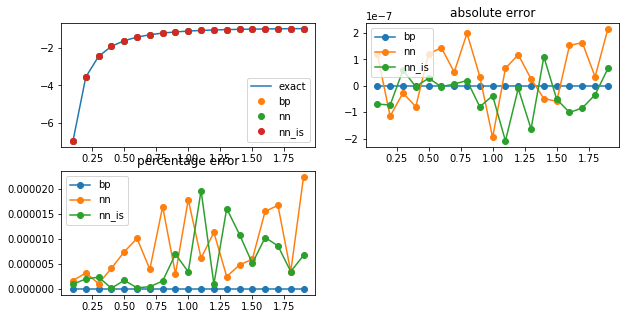

In [24]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

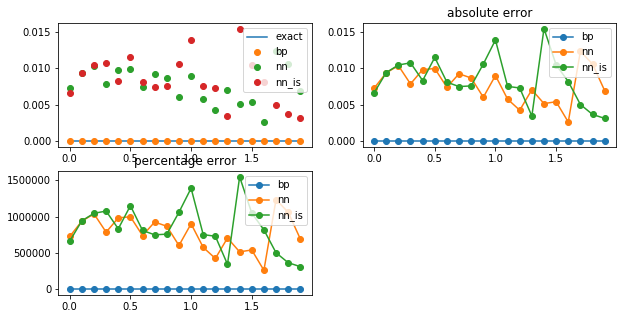

In [25]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

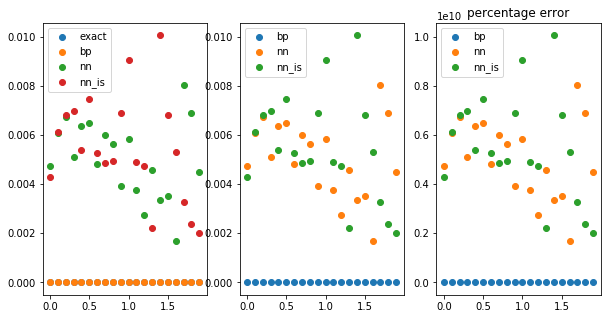

In [26]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

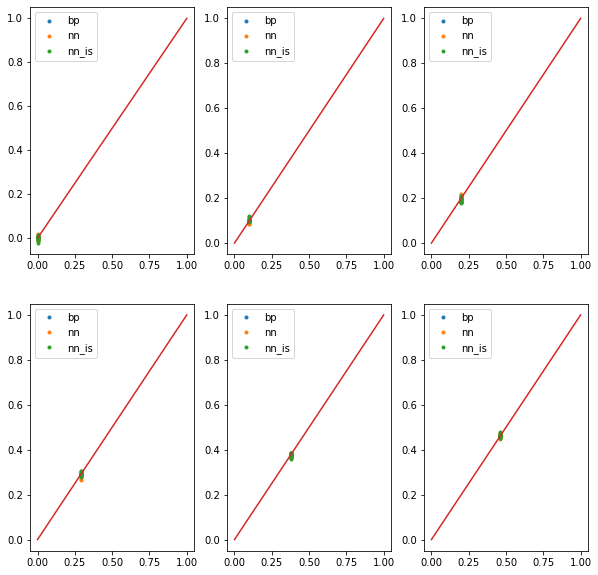

In [27]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()